<a href="https://colab.research.google.com/github/Neha-kumari31/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make Explanatory Visualizations

### Objectives

- identify misleading visualizations and how to fix them
- use Seaborn to visualize distributions and relationships with continuous and discrete variables
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

# Avoid Misleading Visualizations

Did you find/discuss any interesting misleading visualizations in your Walkie Talkie?

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes

<img src="https://kieranhealy.org/files/misc/two-y-by-four-sm.jpg" width="800">
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width='600'>
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">

## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

# Tips for choosing an appropriate visualization:

## Use Appropriate "Visual Vocabulary"

[Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)

## What are the properties of your data?
- Is your primary variable of interest continuous or discrete?
- Is in wide or long (tidy) format?
- Does your visualization involve multiple variables?
- How many dimensions do you need to include on your plot?

Can you express the main idea of your visualization in a single sentence?

How hard does your visualization make the user work in order to draw the intended conclusion?

## Which Visualization tool is most appropriate? 

[Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)

## Anatomy of a Matplotlib Plot

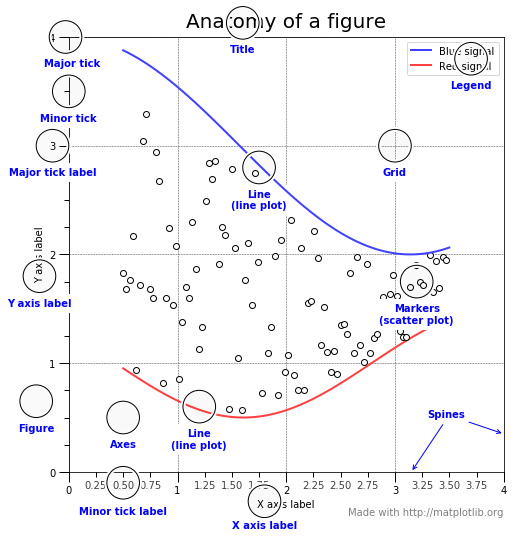

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

##simple webscraper with IMDb

In [0]:
# send request to server to get raw html in string
from requests import get
url = 'https://www.imdb.com/title/tt6105098/ratings?ref_=tt_ov_rt'
#save response from get
response=get(url)
print(response.text[:500]) # to get the first 500 text field











<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///title/tt6105098?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
     


In [0]:
#response.

In [0]:
from bs4 import BeautifulSoup
# parse the raw html string into html object
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [0]:
# soup object that contins vote
vote_container=html_soup.find_all('div', class_="leftAligned")
vote_container[1:11]

[<div class="leftAligned">11,139</div>,
 <div class="leftAligned">7,245</div>,
 <div class="leftAligned">13,492</div>,
 <div class="leftAligned">14,482</div>,
 <div class="leftAligned">7,739</div>,
 <div class="leftAligned">3,585</div>,
 <div class="leftAligned">1,621</div>,
 <div class="leftAligned">1,095</div>,
 <div class="leftAligned">818</div>,
 <div class="leftAligned">2,727</div>]

In [0]:
#to get text in the container
votes=[container.text for container in vote_container][1:11]
votes

['11,139',
 '7,245',
 '13,492',
 '14,482',
 '7,739',
 '3,585',
 '1,621',
 '1,095',
 '818',
 '2,727']

In [0]:
#to map each string into integer
#list(map(int,votes))

In [0]:
urls = ['https://www.imdb.com/title/tt6105098/ratings?ref_=tt_ov_rt',     # Lion King (2019)
        'https://www.imdb.com/title/tt0110357/ratings?ref_=tt_ov_rt',     # Lion King (1994)
        'https://www.imdb.com/title/tt6139732/ratings?ref_=tt_ov_rt',     # Aladdin (2019)
        'https://www.imdb.com/title/tt0103639/ratings?ref_=tt_ov_rt']     # Aladdin (1992) w/ Robin Williams


votes_list = []
for url in urls:
    # Get raw HTML response
    response = get(url)
    
    # Convert to BS Object
    html_soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find vote containers and extract star ratings
    vote_containers = html_soup.find_all('div', class_ = 'leftAligned')
    votes = [containers.text for containers in vote_containers][1:11]
        
    # Append to initial list
    votes_list.append(votes)
    
print(votes_list)

[['11,139', '7,245', '13,492', '14,482', '7,739', '3,585', '1,621', '1,095', '818', '2,727'], ['254,922', '219,421', '213,709', '100,768', '33,108', '13,254', '5,345', '3,010', '1,970', '4,958'], ['14,859', '11,826', '22,824', '20,420', '8,681', '3,370', '1,525', '921', '670', '2,403'], ['58,933', '61,262', '111,174', '61,578', '20,595', '7,060', '2,593', '1,199', '689', '1,250']]


In [0]:
#votes_list1= votes_list.str.replace(',' , '')
#votes_list1

In [0]:
import pandas as pd

movies = ['The Lion King (2019)', 'The Lion King (1994)', 'Aladdin (2019)', 'Aladdin (1992)']

df = pd.DataFrame(votes_list)
df 

,0,1,2,3,4,5,6,7,8,9
0,"11,139","7,245","13,492","14,482","7,739","3,585","1,621","1,095",818,"2,727"
1,"254,922","219,421","213,709","100,768","33,108","13,254","5,345","3,010","1,970","4,958"
2,"14,859","11,826","22,824","20,420","8,681","3,370","1,525",921,670,"2,403"
3,"58,933","61,262","111,174","61,578","20,595","7,060","2,593","1,199",689,"1,250"


In [0]:
df=df.T
df

,0,1,2,3
0,"11,139","254,922","14,859","58,933"
1,"7,245","219,421","11,826","61,262"
2,"13,492","213,709","22,824","111,174"
3,"14,482","100,768","20,420","61,578"
4,"7,739","33,108","8,681","20,595"
5,"3,585","13,254","3,370","7,060"
6,"1,621","5,345","1,525","2,593"
7,"1,095","3,010",921,"1,199"
8,818,"1,970",670,689
9,"2,727","4,958","2,403","1,250"


In [0]:
import pandas as pd

movies = ['The Lion King (2019)', 'The Lion King (1994)', 'Aladdin (2019)', 'Aladdin (1992)']

df = pd.DataFrame(votes_list)
df = df.T
df.columns = movies
df = df.apply(lambda x: x.str.replace(',',''))
df['Star Rating'] = range(1,11)[::-1]
df

,The Lion King (2019),The Lion King (1994),Aladdin (2019),Aladdin (1992),Star Rating
0,11139,254922,14859,58933,10
1,7245,219421,11826,61262,9
2,13492,213709,22824,111174,8
3,14482,100768,20420,61578,7
4,7739,33108,8681,20595,6
5,3585,13254,3370,7060,5
6,1621,5345,1525,2593,4
7,1095,3010,921,1199,3
8,818,1970,670,689,2
9,2727,4958,2403,1250,1


In [0]:
# convert df into tidy format
df_tidy=df.melt(id_vars='Star Rating')
df_tidy=df_tidy.rename(columns={'variable': 'movies','value':'no of votes'})
df_tidy


,Star Rating,movies,no of votes
0,10,The Lion King (2019),11139
1,9,The Lion King (2019),7245
2,8,The Lion King (2019),13492
3,7,The Lion King (2019),14482
4,6,The Lion King (2019),7739
5,5,The Lion King (2019),3585
6,4,The Lion King (2019),1621
7,3,The Lion King (2019),1095
8,2,The Lion King (2019),818
9,1,The Lion King (2019),2727


In [0]:
df_tidy['Vote Percent'] = df_tidy.groupby('movies')['no of votes'].apply(lambda x: x / x.sum() * 100)
df_tidy.head()

,Star Rating,movies,no of votes,Vote Percent
0,10,The Lion King (2019),11139,17.420202
1,9,The Lion King (2019),7245,11.330404
2,8,The Lion King (2019),13492,21.100042
3,7,The Lion King (2019),14482,22.648296
4,6,The Lion King (2019),7739,12.102967


In [0]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
Star Rating    40 non-null int64
movies         40 non-null object
no of votes    40 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.0+ KB


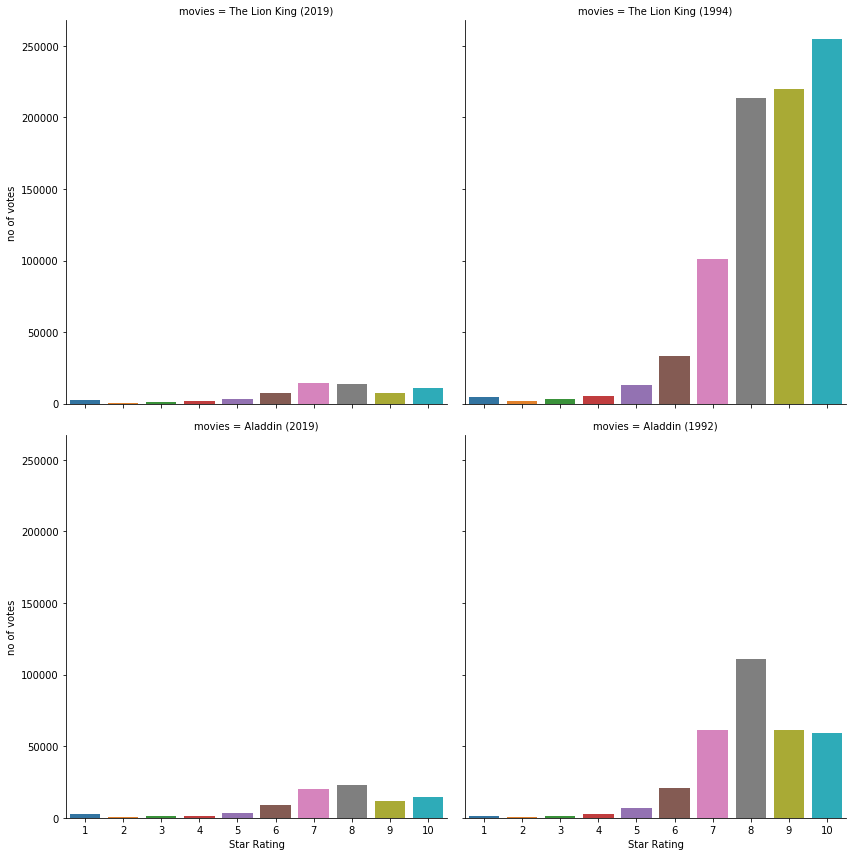

In [0]:
import seaborn as sns
#col to create seprate graph for each variable
#colwrap to show no of plot per column
sns.catplot(x='Star Rating', y='no of votes', col='movies',col_wrap=2, height=6, kind='bar', data=df_tidy)

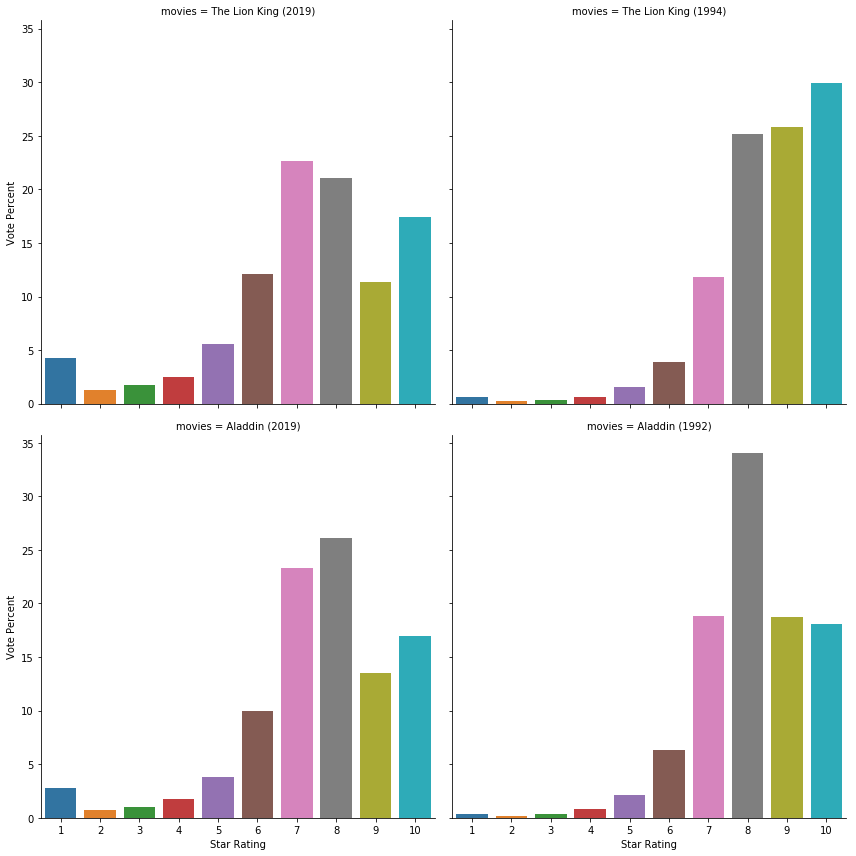

In [0]:
sns.catplot(x='Star Rating', y='Vote Percent', col='movies',col_wrap=2, height=6, kind='bar', data=df_tidy)

# Making Explanatory Visualizations with Seaborn

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

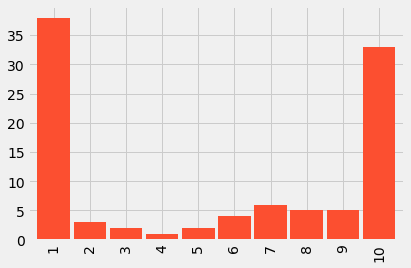

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

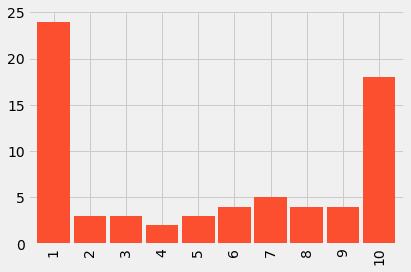

In [0]:
# recreate using value count
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

In [0]:
display(example)

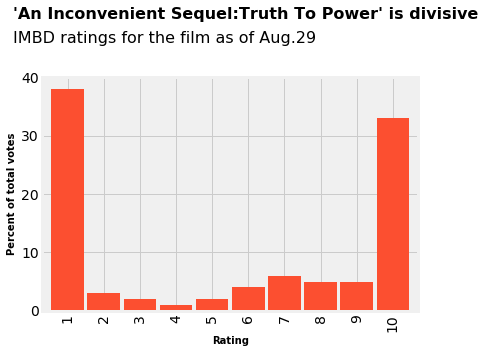

In [0]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig, ax=plt.subplots(facecolor='white')
fake.plot.bar(color='C1', width=0.9);
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of total votes',fontsize=10, fontweight='bold')
#plt.title("'An Inconvenient Sequel:Truth To Power' is divisive")
# multiple input
plt.text(x=-1.5, y=50, fontsize=16,fontweight='bold',
    s="'An Inconvenient Sequel:Truth To Power' is divisive")
plt.text(x=-1.5, y=46, fontsize=16,
    s="IMBD ratings for the film as of Aug.29")
plt.yticks(range(0,41,10));

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
print(df.shape)
df.head()

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
df.category.value_counts()

Males Aged 45+        4216
Males under 18        4216
Aged 30-44            4216
Females Aged 45+      4216
US users              4216
IMDb staff            4216
Females               4216
Females Aged 18-29    4216
IMDb users            4216
Males                 4216
Males Aged 30-44      4216
Males Aged 18-29      4216
Non-US users          4216
Aged 45+              4216
Aged under 18         4216
Females Aged 30-44    4216
Top 1000 voters       4216
Aged 18-29            4216
Females under 18      4165
Name: category, dtype: int64

In [0]:
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [0]:
df['timestamp']= pd.to_datetime(df['timestamp'])
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df_imdb = df[df.category == 'IMDb users']
print(df_imdb.shape)
df_imdb

In [0]:
final=df_imdb.tail(1)
final

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
#To create list
#columns=['{}_pct'.format(i) for i in range(1,11)]
columns=[f'{i}_pct' for i in range(1,11)]
columns

['1_pct',
 '2_pct',
 '3_pct',
 '4_pct',
 '5_pct',
 '6_pct',
 '7_pct',
 '8_pct',
 '9_pct',
 '10_pct']

In [0]:
data=final[columns]
data

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80052,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
data=data.T
data.index = range(1,11)
data

,80052
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


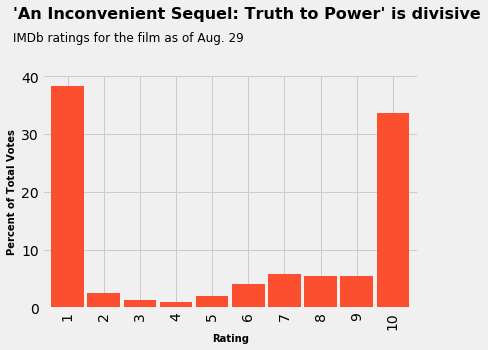

In [0]:
plt.style.use('fivethirtyeight')

data.plot.bar(color='C1', width=0.9, legend=False)
plt.text(x=-1.5, y=50, fontsize=16, fontweight='bold',
         s = "'An Inconvenient Sequel: Truth to Power' is divisive")
plt.text(x=-1.5, y=46, fontsize=12,
         s = "IMDb ratings for the film as of Aug. 29")
plt.yticks([0, 10, 20, 30, 40])
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold');

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### 1) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

#### 2) Reproduce one of the following using a library other than Seaborn or Matplotlib.

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









## Thanksgiving-2015 data

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv'
dfthanks=pd.read_csv(url)
print(dfthanks.shape)
dfthanks.head()

(1058, 65)


,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Whic

In [0]:
from IPython.display import display, Image
url='https://fivethirtyeight.com/wp-content/uploads/2015/11/hickey-side-dish-1.png?w=575'
example= Image(url=url, width=575)
display(example)

In [0]:
dfthanks.info()

In [0]:
dfthanks.columns=[column.replace('Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - ' ,'') for column in dfthanks ]
dfthanks.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,Fruit salad,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,Other (please specify),Other (please specify).1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Blondies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Brownies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Carrot cake,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Cheesecake,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Cookies,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Fudge,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Ice cream,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Peach cobbler,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - None,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Do you typically pray before or after the Thanksgiving meal?,How far will you travel for Thanksgiving?,Will you watch any of the following programs on Thanksgiving? Please select all that apply. - Macy's Parade,"What's the age cutoff at your ""kids' table"" at Thanksgiving?",Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever att

In [0]:
dfside_dish=dfthanks.iloc[:,11:26]
#dfside_dish.head(5)
dfside_dish.head(5)


,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,Fruit salad,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,Other (please specify),Other (please specify).1
0,NaN,Carrots,NaN,NaN,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,NaN,NaN,NaN,Yams/sweet potato casserole,NaN,NaN
1,NaN,NaN,NaN,Corn,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,Other (please specify),Asian vinagrette salad
2,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,NaN,NaN,NaN
3,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,NaN,NaN
4,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,NaN,NaN


In [0]:
dfside_dish.columns= dfside_dish.columns.str.strip()

In [0]:
dfregion=dfthanks[['US Region']]
dfregion.head(5)

,US Region
0,Middle Atlantic
1,East South Central
2,Mountain
3,Pacific
4,Pacific


In [0]:
dfside_dish=dfside_dish.rename(columns={'Other (please specify)': 'other',
                               'Other (please specify).1':'others'})
dfside_dish.head(5)

,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,Fruit salad,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,other,others
0,NaN,Carrots,NaN,NaN,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,NaN,NaN,NaN,Yams/sweet potato casserole,NaN,NaN
1,NaN,NaN,NaN,Corn,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,Other (please specify),Asian vinagrette salad
2,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,NaN,NaN,NaN
3,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,NaN,NaN
4,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,NaN,NaN


In [0]:
merged=pd.merge(dfregion, dfside_dish, how='inner', left_on='US Region',right_on='others')
merged.head()

,US Region,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,Fruit salad,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,other,others
0,NaN,NaN,Carrots,NaN,NaN,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,NaN,NaN,NaN,Yams/sweet potato casserole,NaN,NaN
1,NaN,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,NaN,NaN,NaN
2,NaN,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,NaN,NaN
3,NaN,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,NaN,NaN
4,NaN,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,Fruit salad,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,NaN,NaN
